In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import random
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, confusion_matrix, r2_score
from sklearn.inspection import permutation_importance
import shap
from sklearn.linear_model import LinearRegression, LogisticRegression



df = pd.read_csv('MH_encoded.csv')
df.head()

,Age,Years_of_Experience,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,Productivity_Change,Social_Isolation_Rating,Satisfaction_with_Remote_Work,...,Work_Location_Onsite,Work_Location_Remote,Mental_Health_Condition_Burnout,Mental_Health_Condition_Depression,Mental_Health_Condition_None,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America
0,32,13,47,7,2,1.0,0,0.0,1,0.0,...,False,False,False,True,False,False,True,False,False,False
1,40,3,52,4,1,1.0,0,2.0,3,2.0,...,False,True,False,False,False,True,False,False,False,False
2,59,22,46,11,5,1.0,0,1.0,4,0.0,...,False,False,False,False,False,False,False,True,False,False
3,27,20,32,8,4,2.0,1,2.0,3,0.0,...,True,False,False,True,False,False,True,False,False,False
4,49,32,35,12,2,2.0,1,0.0,3,0.0,...,True,False,False,False,True,False,False,True,False,False


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4629 entries, 0 to 4628
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Age                                 4629 non-null   int64  
 1   Years_of_Experience                 4629 non-null   int64  
 2   Hours_Worked_Per_Week               4629 non-null   int64  
 3   Number_of_Virtual_Meetings          4629 non-null   int64  
 4   Work_Life_Balance_Rating            4629 non-null   int64  
 5   Stress_Level                        4629 non-null   float64
 6   Access_to_Mental_Health_Resources   4629 non-null   int64  
 7   Productivity_Change                 4629 non-null   float64
 8   Social_Isolation_Rating             4629 non-null   int64  
 9   Satisfaction_with_Remote_Work       4629 non-null   float64
 10  Company_Support_for_Remote_Work     4629 non-null   int64  
 11  Physical_Activity                   4629 no

In [71]:
from sklearn.preprocessing import StandardScaler

# Define the numeric features to be standardized
numeric_features = [
    'Age',
    'Years_of_Experience',
    'Hours_Worked_Per_Week',
    'Number_of_Virtual_Meetings',
    'Work_Life_Balance_Rating',
    'Stress_Level',
    'Social_Isolation_Rating',
    'Company_Support_for_Remote_Work'
]

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
df[numeric_features] = scaler.fit_transform(df[numeric_features])

In [72]:
x = df.drop(['Work_Life_Balance_Rating'], axis=1)
y = df['Work_Life_Balance_Rating']

x_train, x_val, y_train, y_val = train_test_split(
    x, y, test_size=0.2, random_state=23)

In [73]:
x_train, y_train = x_train.dropna(), y_train.dropna()



numerical_features = x.columns


numeric_transformer = StandardScaler()

In [74]:
preProcess = ColumnTransformer(
    transformers=[('num', numeric_transformer, numerical_features)])

pipeline = Pipeline([
    ('preprocess', preProcess),
    ('regressor', RandomForestRegressor())
])

print(preProcess.fit_transform(x_train))

param_grid = [{'regressor': [RandomForestRegressor()],
               'regressor__max_depth': [1, 2, 3, 4],
              'regressor__n_estimators': [100, 500]}]

[[ 0.07722583  1.26979286  1.46351717 ...  2.3765763  -0.45969369
  -0.4488792 ]
 [ 1.26799273  1.06344525 -0.96907865 ... -0.42077336 -0.45969369
  -0.4488792 ]
 [ 1.45118764  1.06344525 -1.47237434 ... -0.42077336 -0.45969369
  -0.4488792 ]
 ...
 [-1.47993088 -0.0714666  -1.55625696 ... -0.42077336 -0.45969369
   2.22777085]
 [-1.8463207  -1.00003084  1.37963456 ...  2.3765763  -0.45969369
  -0.4488792 ]
 [-0.6555538   0.96027145  0.54080841 ... -0.42077336  2.17536161
  -0.4488792 ]]


In [75]:
# Cross-validation
cv_mine = KFold(n_splits=5)

# Grid search
gridSearch = GridSearchCV(pipeline, param_grid, cv=cv_mine,
                          scoring='r2', n_jobs=-1)

# Fit the model
gridSearch.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('preprocess',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', '...
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                                       ('regressor', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid=[{'regressor': [RandomForestRegressor()],
                          'regressor__max_depth': [1, 2, 3, 4],
                          'regressor__n_estimators': [100, 500]}],
             scoring='r2')

In [76]:
gridSearch.best_params_

{'regressor': RandomForestRegressor(),
 'regressor__max_depth': 1,
 'regressor__n_estimators': 500}

In [77]:
gridSearch.best_estimator_

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
       'Number_of_Virtual_Meetings', 'Stress_Level',
       'Access_to_Mental_Health_Resources', 'Productivity_Change',
       'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
       'Company_Support_for_Remote_Work', 'Physical_A...
       'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
       'Industry_Retail', 'Work_Location_Onsite', 'Work_Location_Remote',
       'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
       'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
       'Region_North America', 'Region_Oceania', 'Region_South America'],
      dtype='object'))])),
                ('regressor',
                 RandomForestRegressor(max_depth=1, n_estimators=500))])

In [78]:
best_model = gridSearch.best_estimator_

y_pred = best_model.predict(x_val)
print(r2_score(y_val, y_pred))
print(mean_squared_error(y_val, y_pred))

-0.001085025789128169
1.0026635330955085


In [79]:
best_model.named_steps

{'preprocess': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  Index(['Age', 'Years_of_Experience', 'Hours_Worked_Per_Week',
        'Number_of_Virtual_Meetings', 'Stress_Level',
        'Access_to_Mental_Health_Resources', 'Productivity_Change',
        'Social_Isolation_Rating', 'Satisfaction_with_Remote_Work',
        'Company_Support_for_Remote_Work', 'Physical_Activity', 'Sleep_Quality',
        'Gend...
        'Job_Role_Software Engineer', 'Industry_Education', 'Industry_Finance',
        'Industry_Healthcare', 'Industry_IT', 'Industry_Manufacturing',
        'Industry_Retail', 'Work_Location_Onsite', 'Work_Location_Remote',
        'Mental_Health_Condition_Burnout', 'Mental_Health_Condition_Depression',
        'Mental_Health_Condition_None', 'Region_Asia', 'Region_Europe',
        'Region_North America', 'Region_Oceania', 'Region_South America'],
       dtype='object'))]),
 'regressor': RandomForestRegressor(max_depth=1, n_estimators

In [80]:

feature_importances = best_model.named_steps['regressor'].feature_importances_

print("Best parameters:", gridSearch.best_params_)
print("Feature importances:", feature_importances)

Best parameters: {'regressor': RandomForestRegressor(), 'regressor__max_depth': 1, 'regressor__n_estimators': 500}
Feature importances: [0.1   0.18  0.102 0.192 0.008 0.002 0.008 0.082 0.03  0.04  0.016 0.008
 0.002 0.    0.002 0.002 0.084 0.    0.008 0.002 0.054 0.002 0.002 0.002
 0.    0.02  0.008 0.034 0.    0.006 0.002 0.    0.    0.002 0.    0.
 0.   ]


In [81]:
rf = best_model.named_steps['regressor']
preprocessor = best_model.named_steps["preprocess"]
rf

RandomForestRegressor(max_depth=1, n_estimators=500)

In [82]:
# adjust "preprocessor" as needed
if hasattr(preprocessor, 'get_feature_names_out'):
    feature_names = preprocessor.get_feature_names_out()
else:
    feature_names = preprocessor.get_feature_names()

In [83]:
feature_names

array(['num__Age', 'num__Years_of_Experience',
       'num__Hours_Worked_Per_Week', 'num__Number_of_Virtual_Meetings',
       'num__Stress_Level', 'num__Access_to_Mental_Health_Resources',
       'num__Productivity_Change', 'num__Social_Isolation_Rating',
       'num__Satisfaction_with_Remote_Work',
       'num__Company_Support_for_Remote_Work', 'num__Physical_Activity',
       'num__Sleep_Quality', 'num__Gender_Male', 'num__Gender_Non-binary',
       'num__Gender_Prefer not to say', 'num__Job_Role_Designer',
       'num__Job_Role_HR', 'num__Job_Role_Marketing',
       'num__Job_Role_Project Manager', 'num__Job_Role_Sales',
       'num__Job_Role_Software Engineer', 'num__Industry_Education',
       'num__Industry_Finance', 'num__Industry_Healthcare',
       'num__Industry_IT', 'num__Industry_Manufacturing',
       'num__Industry_Retail', 'num__Work_Location_Onsite',
       'num__Work_Location_Remote',
       'num__Mental_Health_Condition_Burnout',
       'num__Mental_Health_Condition_D

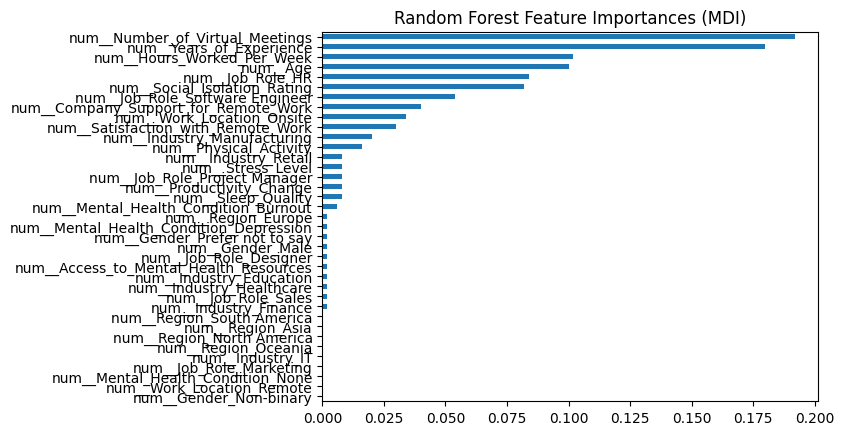

In [84]:
mdi_importances = pd.Series(rf.feature_importances_,
                            index=feature_names).sort_values(ascending=True)

# Plot the importances
ax = mdi_importances.plot.barh()
ax.set_title("Random Forest Feature Importances (MDI)")
plt.show()

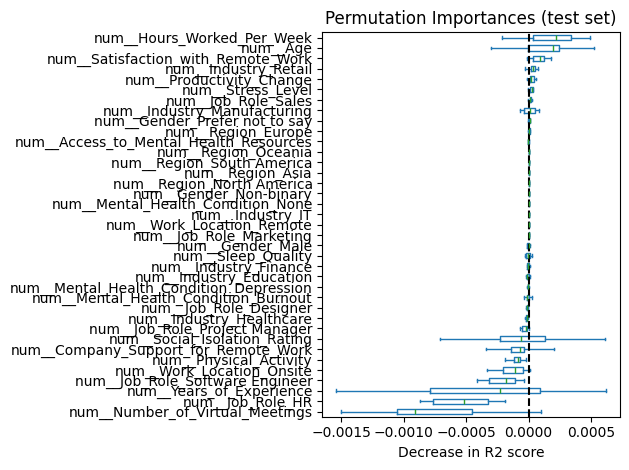

In [85]:
from sklearn.inspection import permutation_importance

# Transform the validation set
X_val_transformed = preprocessor.transform(x_val)

# Create a DataFrame from the transformed validation data
# Get feature names from the preprocessor if it has a feature names attribute
try:
    feature_names = preprocessor.get_feature_names_out()
except AttributeError:
    # Provide custom names if preprocessor lacks `get_feature_names_out`
    feature_names = [f"feature_{i}" for i in range(X_val_transformed.shape[1])]

X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

# Compute permutation feature importance using the test data
result = permutation_importance(
    rf, X_val_transformed, y_val, n_repeats=10, random_state=42, n_jobs=2
)

# Sort importances and prepare a DataFrame for plotting
sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=X_val_transformed_df.columns[sorted_importances_idx],
)

# Plot the permutation feature importance
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in R2 score")

plt.tight_layout()
plt.show()

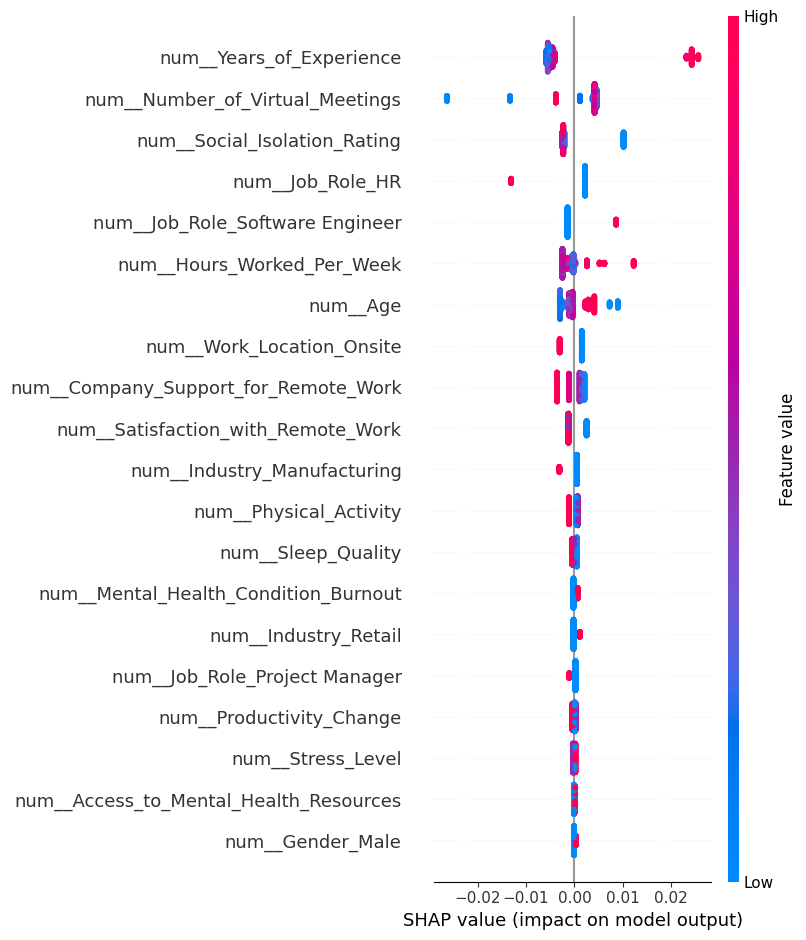

In [86]:
# Plot the SHAP feature importance
X_val_transformed_df = pd.DataFrame(X_val_transformed, columns=feature_names)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_val_transformed_df)
shap.summary_plot(shap_values, X_val_transformed_df)

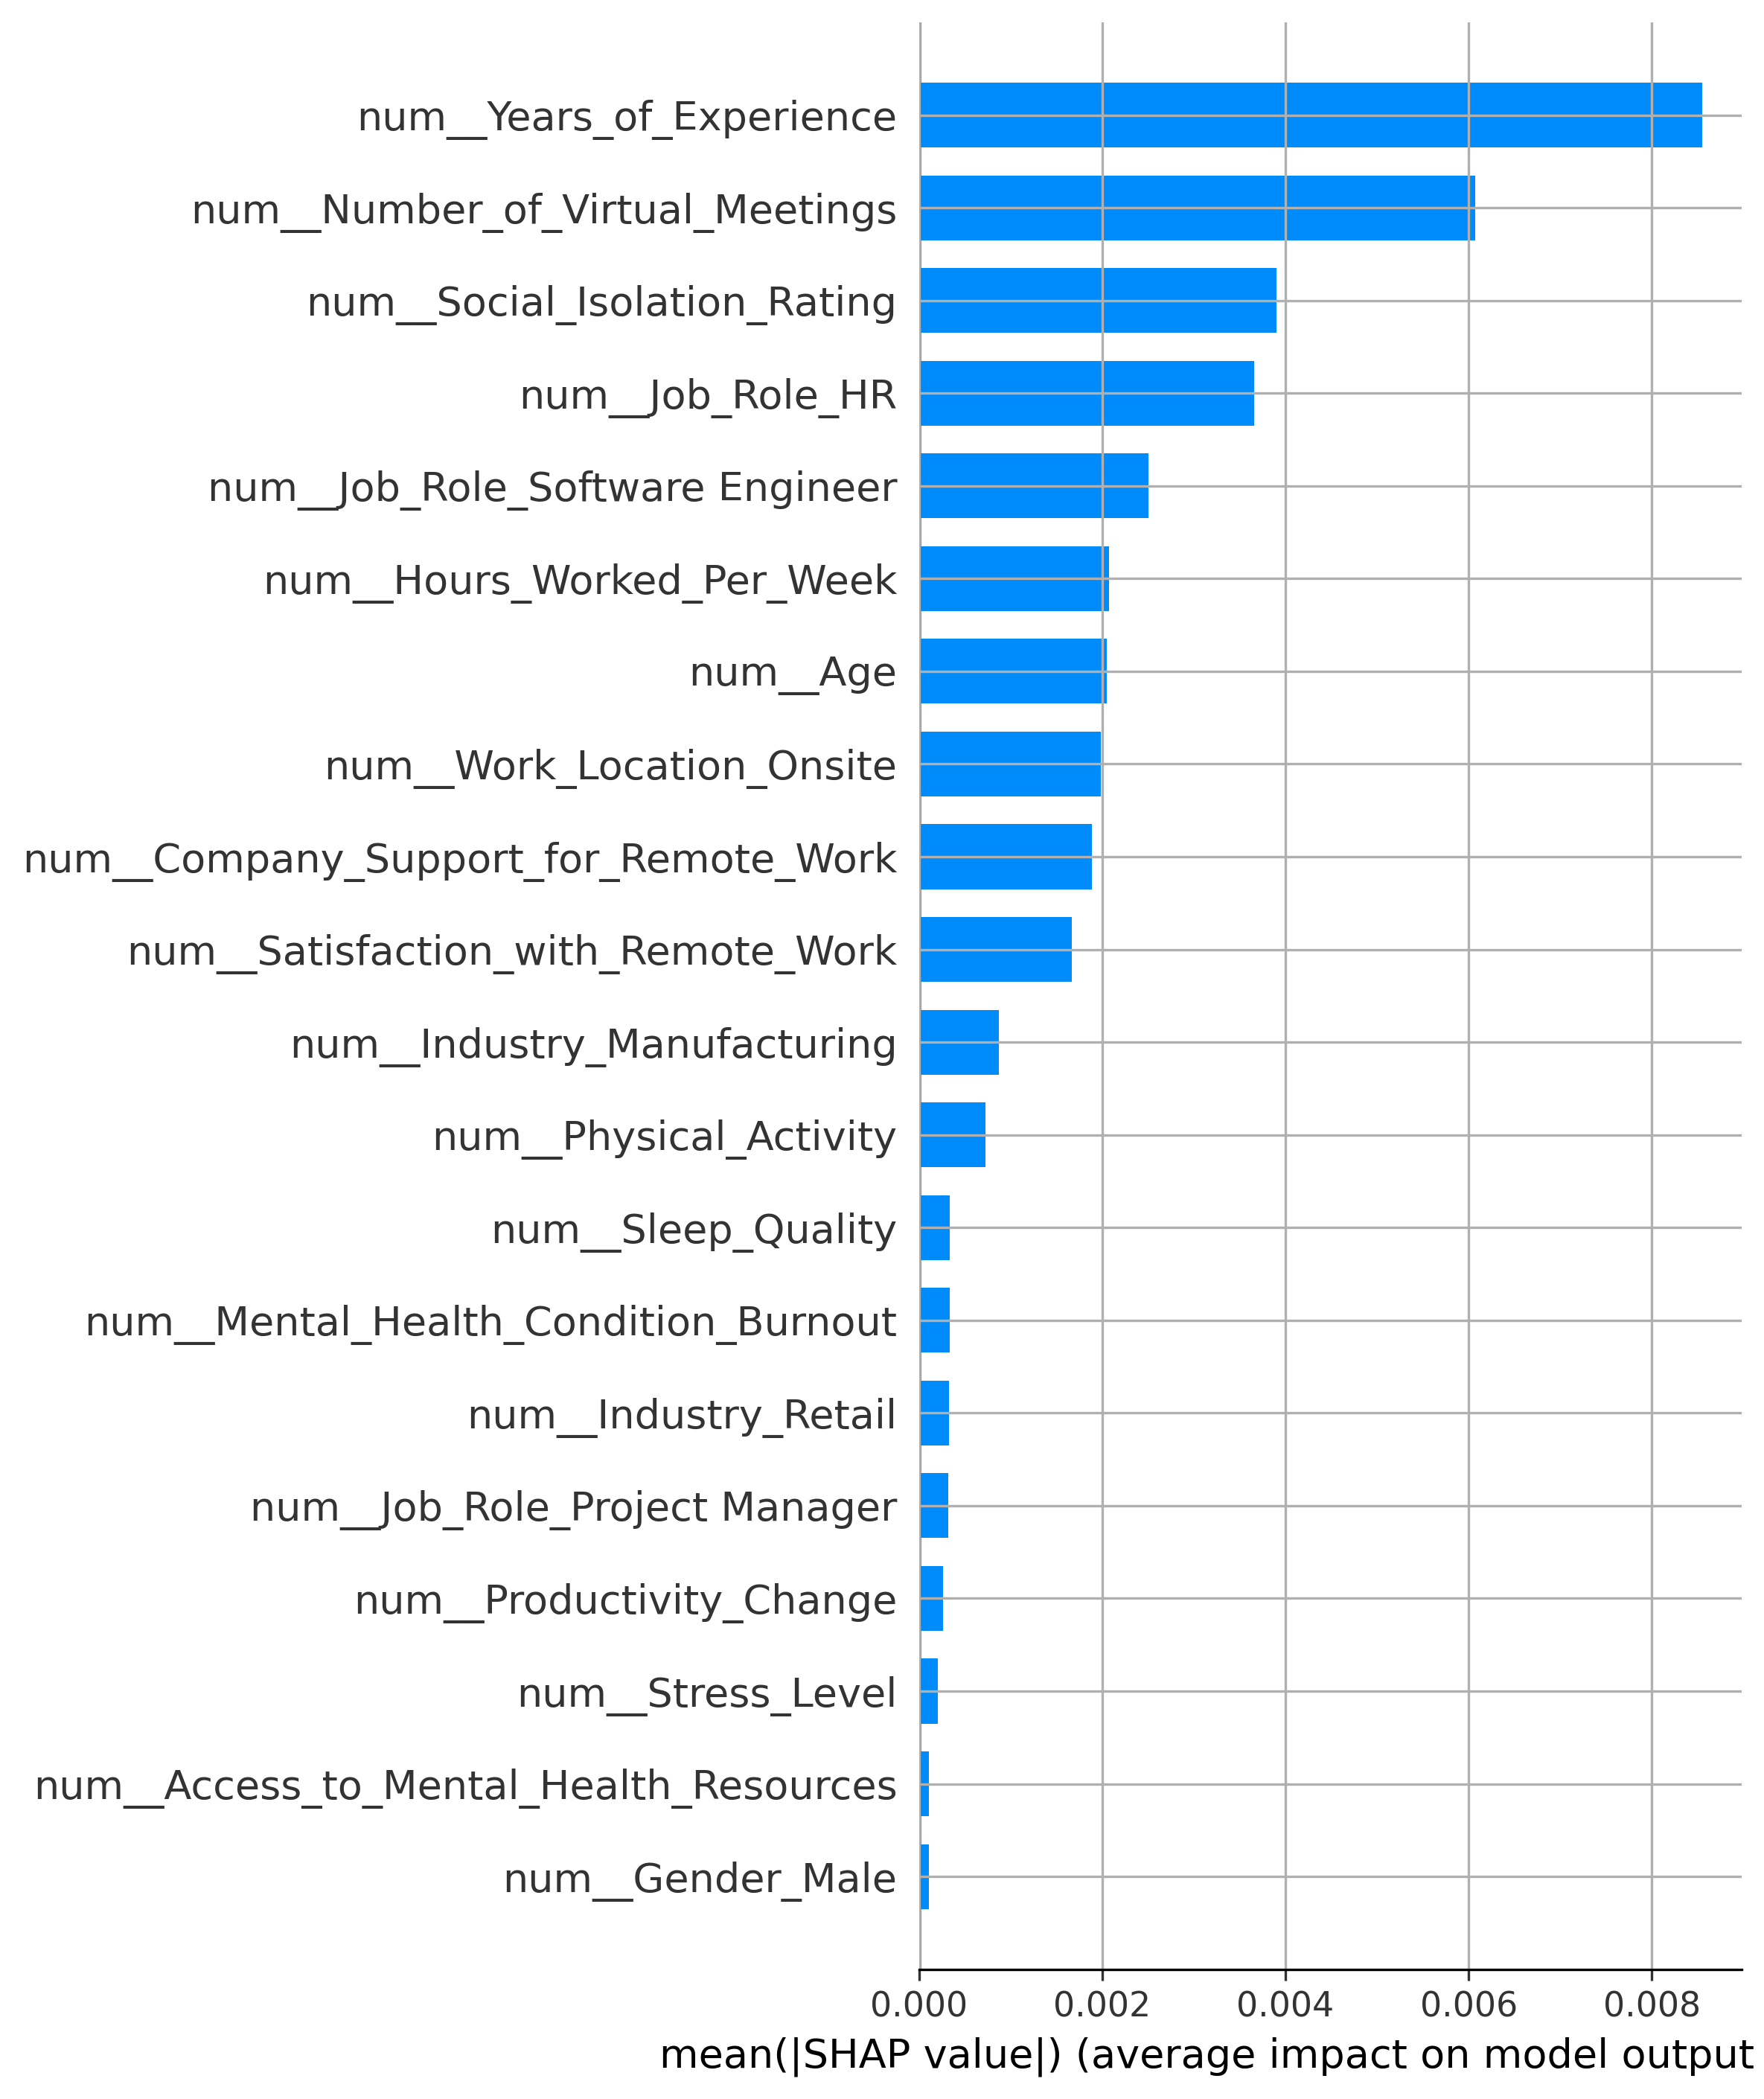

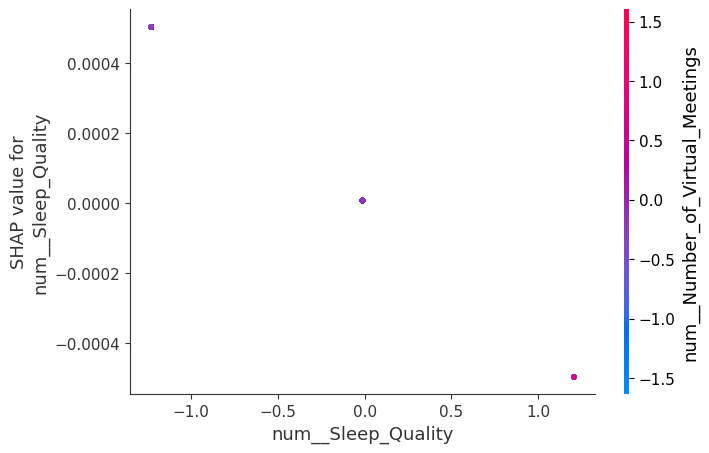

In [87]:
fig = plt.figure(figsize=(6, 3.3), dpi=300)
shap.summary_plot(shap_values, X_val_transformed_df,
                  plot_type="bar", show=False)
plt.grid()
shap.dependence_plot("num__Sleep_Quality", shap_values, X_val_transformed_df)

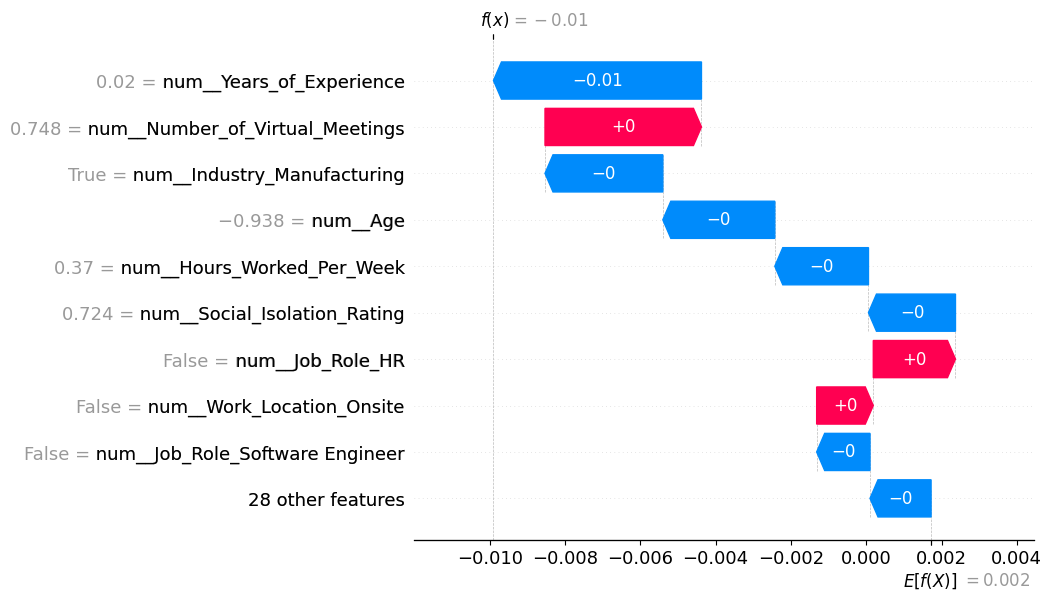

In [88]:
fig = plt.figure(figsize=(6, 3.3))
explanation5 = shap.Explanation(values=shap_values[4], base_values=explainer.expected_value[0],
                                feature_names=X_val_transformed_df.columns, data=x_val.iloc[4, :])
shap.plots.waterfall(explanation5)
fig.tight_layout()